In [17]:
import pandas as pd
import numpy as np

In [18]:
# Read in the Player Information dataset
pi_df = pd.read_csv("PlayerInformationFeatures_after.csv")

In [19]:
pi_df.head(2)

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,Type
0,1047,6482393,46,42,764520,18202.8571,26576.5613,97,27,51,Human
1,1049,6275719,16,16,48300,3018.7500,902.5117,32,13,47,Human


In [20]:
# Change Type as Category
pi_df.Type = pi_df.Type.astype('category')

In [21]:
# Creating a numerical field for Type
pi_df['TypeNum'] = pi_df.Type.cat.codes

In [22]:
# Change the float fields to int.. there is not much of loss of information and improves readability
pi_df.playtime_per_day = pi_df.playtime_per_day.astype('int64')
pi_df.Playtime = pi_df.Playtime.astype('int64')
pi_df.avg_money = pi_df.avg_money.astype('int64')

In [23]:
pi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 12 columns):
Actor               49739 non-null int64
A_Acc               49739 non-null int64
Login_day_count     49739 non-null int64
Logout_day_count    49739 non-null int64
Playtime            49739 non-null int64
playtime_per_day    49739 non-null int64
avg_money           49739 non-null int64
Login_count         49739 non-null int64
ip_count            49739 non-null int64
Max_level           49739 non-null int64
Type                49739 non-null category
TypeNum             49739 non-null int8
dtypes: category(1), int64(10), int8(1)
memory usage: 3.9 MB


In [24]:
pi_df.describe()

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,TypeNum
count,49739.000000,4.973900e+04,49739.000000,49739.000000,4.973900e+04,49739.000000,4.973900e+04,49739.000000,49739.000000,49739.000000,49739.000000
mean,344940.877058,8.483737e+06,30.855707,30.673817,5.768308e+05,16363.167494,1.913816e+04,107.162146,11.802529,34.804379,0.874344
std,127634.620397,1.963675e+06,25.944691,25.731915,1.136282e+06,20648.105291,6.120315e+04,362.662683,12.811193,15.061859,0.331465
min,1047.000000,0.000000e+00,0.000000,1.000000,1.080200e+04,136.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
25%,272154.000000,6.878566e+06,8.000000,8.000000,3.665700e+04,3941.000000,8.110000e+02,16.000000,3.000000,23.000000,1.000000
50%,400583.000000,8.290550e+06,22.000000,22.000000,1.486510e+05,8935.000000,4.536000e+03,48.000000,7.000000,36.000000,1.000000
75%,442200.500000,1.043333e+07,49.000000,49.000000,5.757285e+05,18016.000000,1.717750e+04,124.000000,16.000000,50.000000,1.000000
max,472898.000000,1.136939e+07,88.000000,88.000000,7.334033e+06,160935.000000,2.524605e+06,14865.000000,205.000000,55.000000,1.000000


In [25]:
# 1. We have data for 49739 players.
# 2. Most of the feature distribution is skewed to the right as the mean is greater than mid value at 50%.
# 3. Data distribution of login_day_count and logout_day_count are similar, which means either of them can be taken
# for a model, but not both.


In [26]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_met

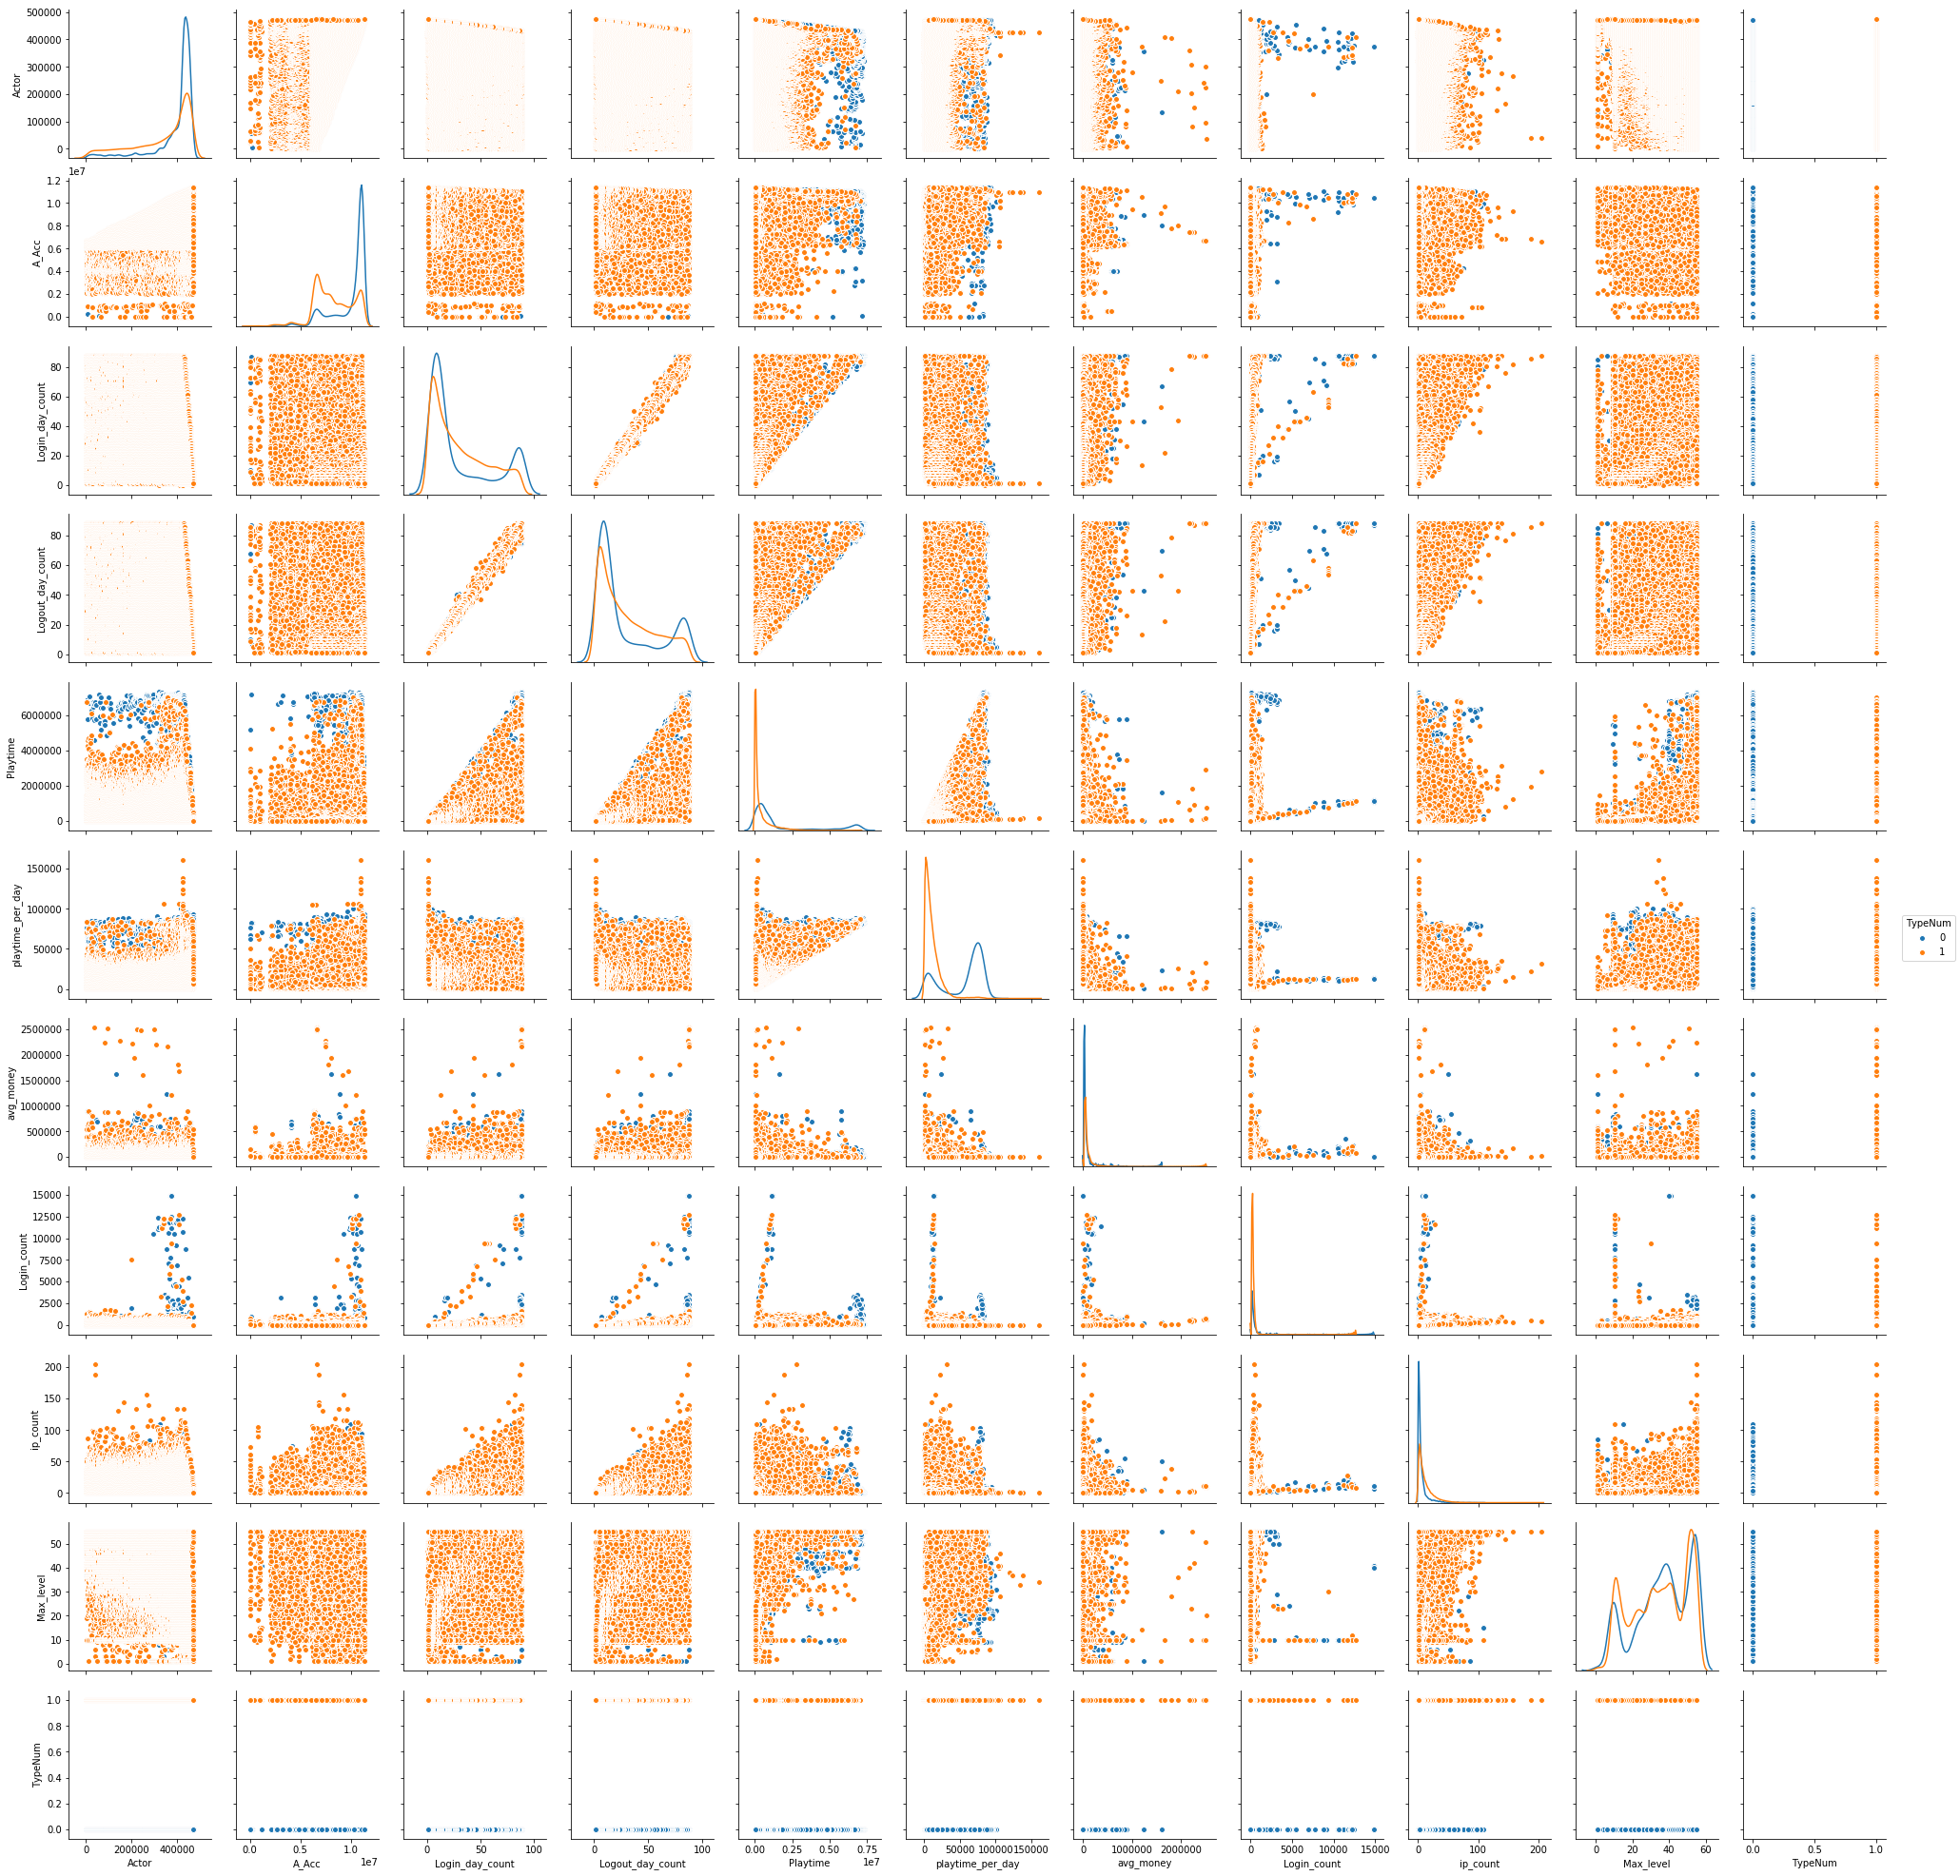

In [27]:
sns.pairplot(pi_df, hue='TypeNum', diag_kind="kde")

In [28]:
pi_df.corr()

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,TypeNum
Actor,1.000000,0.488634,-0.330761,-0.334659,-0.049029,0.155539,-0.146637,-0.092028,-0.174130,-0.486035,-0.155601
A_Acc,0.488634,1.000000,-0.154512,-0.159129,0.122288,0.316907,-0.094415,-0.025593,-0.092992,-0.229043,-0.283073
Login_day_count,-0.330761,-0.154512,1.000000,0.998771,0.605031,0.151984,0.224491,0.330982,0.497034,0.595921,0.000239
Logout_day_count,-0.334659,-0.159129,0.998771,1.000000,0.592791,0.140965,0.225940,0.333565,0.500913,0.594484,0.007174
Playtime,-0.049029,0.122288,0.605031,0.592791,1.000000,0.673960,0.071340,0.169118,0.129555,0.467423,-0.394050
playtime_per_day,0.155539,0.316907,0.151984,0.140965,0.673960,1.000000,-0.031068,0.036955,-0.074441,0.268762,-0.684686
avg_money,-0.146637,-0.094415,0.224491,0.225940,0.071340,-0.031068,1.000000,0.116516,0.052407,0.084365,0.001827
Login_count,-0.092028,-0.025593,0.330982,0.333565,0.169118,0.036955,0.116516,1.000000,0.149204,0.134015,-0.033752
ip_count,-0.174130,-0.092992,0.497034,0.500913,0.129555,-0.074441,0.052407,0.149204,1.000000,0.362901,0.164598
Max_level,-0.486035,-0.229043,0.595921,0.594484,0.467423,0.268762,0.084365,0.134015,0.362901,1.000000,-0.046166


In [29]:
# From the pairplot and correlation matrix, we get the following
# 1. Login_day_count has linear relationship with Logout_day_count. This sounds fine as number player logging in
# has record of logging out too.
# 2. Login/Logout day count has strong relationship with playtime.
# 3. Max level achieved by a player has strong relationship with login count. This could be some game related
# aspect of providing player with a higher level that he plays based on his frequency of login.
# 4. The correlation of total playtime with Type is less than the value of correlation between playtime_per_day
# and Type. This is because over a period of time, a human player might have similar playtime as of a bot. But
# when comparing the values for playtime_per_day, bots seems to play more than humans. Hence this derived feature
# i.e. playtime_per_day makes more sense.
# 4. Type has strong relationship with playtime_per_day. This could come out to be that Bot has higher playtime per
# day than humans, as even with hardcore players, humans tend to take breaks, while bots require any.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

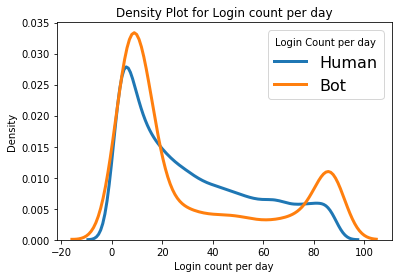

In [30]:
for player_type in ['Human', 'Bot']:
    subset = pi_df[pi_df.Type == player_type]
    sns.distplot(subset['Login_day_count'], hist=False, kde=True,
                 kde_kws={'linewidth': 3}, label=player_type)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Login Count per day')
plt.title('Density Plot for Login count per day')
plt.xlabel('Login count per day')
plt.ylabel('Density')

In [31]:
# From the above, we deduce the following
# 1. There are some values starting in negative range. This seems to be erreneously computed in dataset.
# 2. The density curve of Humans goes peaks at around 5 login counts per day, which means that most of the players
# login 5 -7 times a day. Then the density curve drops with higher login counts per day.
# 3. The density curve for bots shows two different peaks. A peak at 5-7 login count per day, post which the curve
# drops, and then peaks again at 80-90 login counts per day. So it seems that there are two kinds of Bots in the
# dataset. One which is following the pattern of humans for login counts, and other which does not. It is not
# clear of the purpose of the bot in the second group.


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

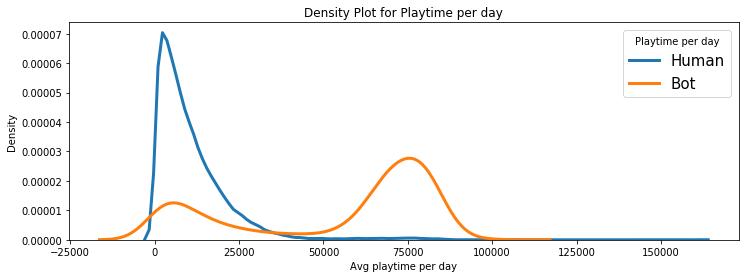

In [32]:
plot_dims = (12, 4)
fig, axis = plt.subplots(figsize=plot_dims)

for player_type in ['Human', 'Bot']:
    subset = pi_df[pi_df.Type == player_type]
    sns.distplot(subset['playtime_per_day'], hist=False, kde=True,
                 kde_kws={'linewidth': 3}, label=player_type, ax=axis)
    
# Plot formatting
plt.legend(prop={'size': 15}, title = 'Playtime per day')
plt.title('Density Plot for Playtime per day')
plt.xlabel('Avg playtime per day')
plt.ylabel('Density')


# From the pair plot and correlation matrix analysis, it was clear that playtime per day has strong relationship with Type. In this KDE plot, its clear that most of the human players does not spend high playtime per day. They may play for couple of hours and leave. But most of the bot players spend close to 20 hours playing in a day.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

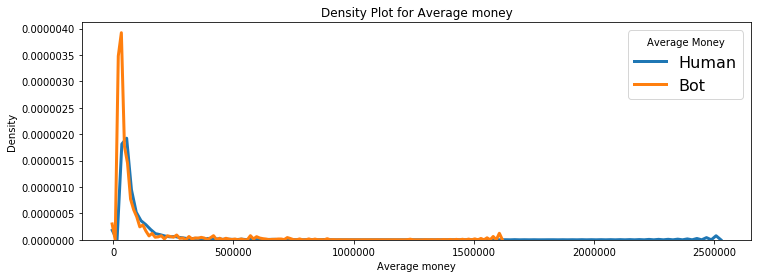

In [33]:
plot_dims = (12, 4)
fig, axis = plt.subplots(figsize=plot_dims)

for player_type in ['Human', 'Bot']:
    subset = pi_df[pi_df.Type == player_type]
    sns.distplot(subset['avg_money'], hist=False, kde=True,
                 kde_kws={'linewidth': 3}, label=player_type, ax=axis)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Average Money')
plt.title('Density Plot for Average money')
plt.xlabel('Average money')
plt.ylabel('Density')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

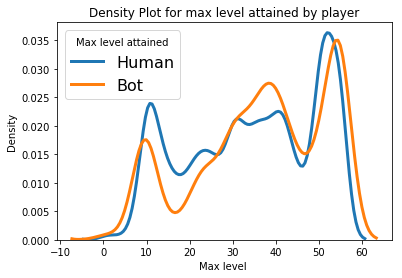

In [34]:
for player_type in ['Human', 'Bot']:
    subset = pi_df[pi_df.Type == player_type]
    sns.distplot(subset['Max_level'], hist=False, kde=True,
                 kde_kws={'linewidth': 3}, label=player_type)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Max level attained')
plt.title('Density Plot for max level attained by player')
plt.xlabel('Max level ')
plt.ylabel('Density')

In [35]:
# From the above, we can not clearly distinguish between a bot and player based on the game level a player is able
# to achieve. It is possible that bot could achieve higher levels with little time, but that information can not
# be extracted with just the "max_level" feature alone.

# Removing incorrect data

In [36]:
# We know for sure that there are 86400 in a day. Since playtime_per_day is important feature as it has strong
# correlation to the target Type column, lets remove the values which are more than 86400
pi_df[pi_df.playtime_per_day > 86400].groupby(by=['Type']).count()

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,TypeNum
Type,,,,,,,,,,,
Bot,67,67,67,67,67,67,67,67,67,67,67
Human,29,29,29,29,29,29,29,29,29,29,29


In [37]:
# Drop the 
pi_df = pi_df[pi_df.playtime_per_day < 86400]

In [38]:
# Looking at the data distribution now
pi_df[["Actor", "Type"]].groupby(by=["Type"]).count()

# Seems that the data is distributed in 1:7 ratio between Bot:Human. The model's ability to predict Human will 
# be better than predicting class Bot. 

,Actor
Type,
Bot,6183
Human,43460


# Making the ip_count, avg_money distribution normal. These features are having distributions having a very long tail. So we make a log transformation to get the data into normal distribution, so that the model that we build making use of these features works better. 

In [40]:
pi_df.avg_money = pi_df.avg_money.apply(np.log)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [87]:
tmp = pi_df.avg_money.copy()
#print(type(tmp))
#print(tmp.describe())
#print(tmp.max(), tmp.min())
# Find locations of -ve infinity
negative_inf_indices = tmp[tmp == -np.inf].index
tmp.drop(negative_inf_indices, inplace=True)
#print(tmp.max(), tmp.min())
#print(tmp.describe())
#tmp = tmp.drop(labels=[-(np.inf)], axis=1)
#print(pi_df.avg_money.max())
#print(pi_df.avg_money.value_counts())
# Replacing the negative infinity value to zero
pi_df.avg_money.replace(to_replace=-np.inf, value=tmp.min(), inplace=True)
print(pi_df.avg_money.max())
print(pi_df.avg_money.min())


14.741595172810701
0.0


/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [95]:
pi_df.ip_count = pi_df.ip_count.apply(np.log)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [96]:
tmp = pi_df.ip_count.copy()
negative_inf_indices = tmp[tmp == -np.inf].index
tmp.drop(negative_inf_indices, inplace=True)
pi_df.ip_count.replace(to_replace=-np.inf, value=tmp.min(), inplace=True)
print(pi_df.ip_count.max())
print(pi_df.ip_count.min())


5.3230099791384085
0.0


/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

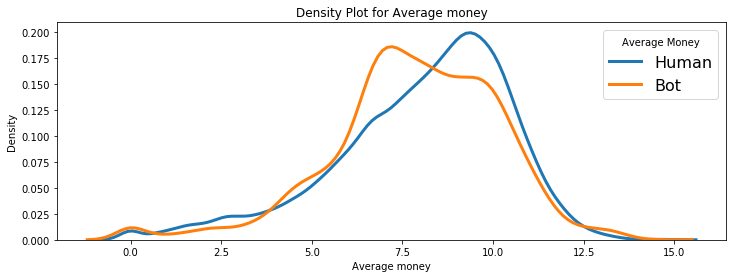

In [127]:
plot_dims = (12, 4)
fig, axis = plt.subplots(figsize=plot_dims)

for player_type in ['Human', 'Bot']:
    subset = pi_df[pi_df.Type == player_type]
    sns.distplot(subset['avg_money'], hist=False, kde=True,
                 kde_kws={'linewidth': 3}, label=player_type, ax=axis)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Average Money')
plt.title('Density Plot for Average money')
plt.xlabel('Average money')
plt.ylabel('Density')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

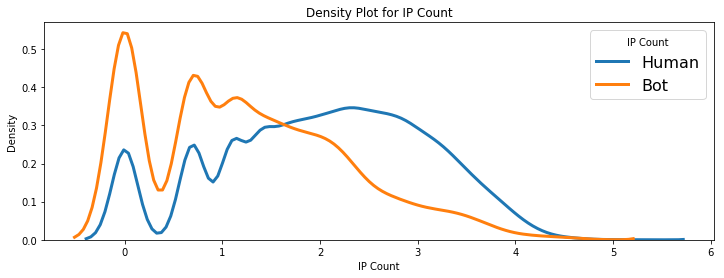

In [128]:
plot_dims = (12, 4)
fig, axis = plt.subplots(figsize=plot_dims)

for player_type in ['Human', 'Bot']:
    subset = pi_df[pi_df.Type == player_type]
    sns.distplot(subset['ip_count'], hist=False, kde=True,
                 kde_kws={'linewidth': 3}, label=player_type, ax=axis)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'IP Count')
plt.title('Density Plot for IP Count')
plt.xlabel('IP Count')
plt.ylabel('Density')

# Model Building

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [98]:
# Based on correlation analysis, only playtime_per_day has strong relationship with Type. So we will include that.
# Many features are derived features like login_day_count is derived from login_count. So we will take only one out those.
# None of other cols have strong relationship with TypeNum. We will just take some of the features which we think
# can improve model accuracy.

#X_cols = ['playtime_per_day', 'Login_count', 'ip_count', 'avg_money', 'Max_level']
X_cols = ['playtime_per_day', 'ip_count']
y_col = ['TypeNum']
X = pi_df[X_cols]
y = pi_df[y_col]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [100]:
log_reg_model = LogisticRegression()

In [101]:
log_reg_model.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [102]:
y_predict = log_reg_model.predict(X_test)

In [103]:
log_reg_score = log_reg_model.score(X_test, y_test)

In [104]:
print(log_reg_score)

0.9446048479151279


In [105]:
metrics.confusion_matrix(y_test, y_predict)

array([[ 1214,   621],
       [  204, 12854]])

In [106]:
# the count of true negatives is `C_{0,0}`, false negatives is `C_{1,0}`, 
# true positives is `C_{1,1}` and false positives is `C_{0,1}`.

# Out of 1835 Bots, the logistic regression model is able to predict 1220 correctly(True negative). 
# But 202 were incorrectly classified as Bots.
# 12856 were correctly clasified as Humans. But 615 Bots were incorrectly classfied as Humans.

In [107]:
from sklearn.metrics import precision_score, recall_score, roc_curve, f1_score, classification_report

In [108]:
print("Overall precision of Logistic Regression: %s" % precision_score(y_test, y_predict))
print("Overall recall of Logistic Regression: %s" % recall_score(y_test, y_predict))
print("Overall F1 Score of Logistic Regression: %s" % f1_score(y_test, y_predict))

Overall precision of Logistic Regression: 0.9539146567717997
Overall recall of Logistic Regression: 0.9843773931689386
Overall F1 Score of Logistic Regression: 0.9689066445558361


In [109]:
print(classification_report(y_test, y_predict, [0, 1]))

              precision    recall  f1-score   support

           0       0.86      0.66      0.75      1835
           1       0.95      0.98      0.97     13058

   micro avg       0.94      0.94      0.94     14893
   macro avg       0.91      0.82      0.86     14893
weighted avg       0.94      0.94      0.94     14893



# Running against different models

In [110]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [111]:
# Get all the models in a list
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("Tree", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
#models.append(("SVC", SVC()))

In [112]:
# For running against cross validation, lets take all the relavant cols of the dataset, rather than just taking
# the ones which showed strong correlation.
X = pi_df[['playtime_per_day', 'Login_count', 'ip_count', 'avg_money', 'Max_level']]

results = []
model_names = []
for model_name, model in models:
    kfold_cv = model_selection.KFold(n_splits=10, random_state=23)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold_cv, scoring='accuracy')
    #print(model_name, cv_results)
    results.append(cv_results)
    model_names.append(model_name)
    msg = "%s: %f (%f)" % (model_name, cv_results.mean(), cv_results.std())
    print(msg)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:43

LR: 0.945167 (0.018849)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LDA: 0.943979 (0.018849)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when

KNN: 0.940735 (0.020617)
Tree: 0.902482 (0.023682)
NB: 0.940595 (0.017690)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [113]:
print(results)

[array([0.96374622, 0.96495468, 0.96636455, 0.94903304, 0.94460113,
       0.93795326, 0.89826753, 0.94379533, 0.93553586, 0.94742143]), array([0.96294058, 0.9633434 , 0.9653575 , 0.94661563, 0.94238517,
       0.93634166, 0.89645447, 0.94480258, 0.93815471, 0.94339243]), array([0.9611279 , 0.96455186, 0.96475327, 0.94782434, 0.94057212,
       0.93553586, 0.89403707, 0.93896052, 0.92002417, 0.93996777]), array([0.92910373, 0.93232628, 0.92769386, 0.91156326, 0.90713135,
       0.89806608, 0.85737309, 0.90551974, 0.87590653, 0.88013699]), array([0.95045317, 0.95830816, 0.96072508, 0.94097502, 0.93976632,
       0.93311845, 0.89383562, 0.94560838, 0.93694601, 0.94621273])]


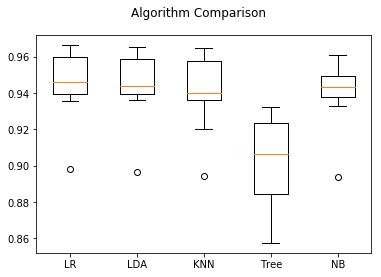

In [114]:
# Plotting the results of cross validation in box plot to check the variation of cross validation scores of each algo.
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_names)
plt.show()

In [115]:
# From the above, it seems that LDA is giving the best results. Its mean CV score is higher than others and
# it also has more compact box plots, which means that there is not much variation in results.

In [116]:
X_cols = ['playtime_per_day', 'ip_count']
y_col = ['TypeNum']
X = pi_df[X_cols]
y = pi_df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

for model_name, model in models:
    print("Running model %s" % model_name)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    score = model.score(X_test, y_test)
    print("Confusion Matrix: ")
    print(metrics.confusion_matrix(y_test, y_predict))
    print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
    print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
    print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
    print("Classification Report: ")
    print(classification_report(y_test, y_predict, [0, 1]))
    

Running model LR
Confusion Matrix: 
[[ 1214   621]
 [  204 12854]]
Overall precision of LR: 0.9539146567717997
Overall recall of LR: 0.9843773931689386
Overall F1 Score of LR: 0.9689066445558361
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.66      0.75      1835
           1       0.95      0.98      0.97     13058

   micro avg       0.94      0.94      0.94     14893
   macro avg       0.91      0.82      0.86     14893
weighted avg       0.94      0.94      0.94     14893

Running model LDA
Confusion Matrix: 


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 1255   580]
 [  251 12807]]
Overall precision of LDA: 0.9566743855979681
Overall recall of LDA: 0.9807780670853117
Overall F1 Score of LDA: 0.968576290414067
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.68      0.75      1835
           1       0.96      0.98      0.97     13058

   micro avg       0.94      0.94      0.94     14893
   macro avg       0.90      0.83      0.86     14893
weighted avg       0.94      0.94      0.94     14893

Running model KNN
Confusion Matrix: 
[[ 1188   647]
 [  216 12842]]
Overall precision of KNN: 0.9520349914745349
Overall recall of KNN: 0.9834584162965232
Overall F1 Score of KNN: 0.9674916186386411
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.65      0.73      1835
           1       0.95      0.98      0.97     13058

   micro avg       0.94      0.94      0.94     14893
   macro avg       0.90      0.82      0.85    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Confusion Matrix: 
[[ 1134   701]
 [  753 12305]]
Overall precision of Tree: 0.946101799169614
Overall recall of Tree: 0.942334201255935
Overall F1 Score of Tree: 0.9442142418661756
Classification Report: 
              precision    recall  f1-score   support

           0       0.60      0.62      0.61      1835
           1       0.95      0.94      0.94     13058

   micro avg       0.90      0.90      0.90     14893
   macro avg       0.77      0.78      0.78     14893
weighted avg       0.90      0.90      0.90     14893

Running model NB
Confusion Matrix: 
[[ 1265   570]
 [  300 12758]]
Overall precision of NB: 0.9572328931572629
Overall recall of NB: 0.9770255781896156
Overall F1 Score of NB: 0.9670279693777002
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.69      0.74      1835
           1       0.96      0.98      0.97     13058

   micro avg       0.94      0.94      0.94     14893
   macro avg       0.88      0

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# From the above, we get the following analysis
# 1. Linear Discriminant Analysis and Linear Regression performs best. This is due to the fact that the in the dataset, the playtime_per_day has strong correlation with Type column.
# 2. The overall score of both the algo is in the range of 95%. But the recall score of classifying a bot in both cases is close to 66%. This means that for both the algorithms, there was one incorrect prediction of bot as human for every two correct predictions of bots.
# 3. The precision score for bot prediction is close to 83% i.e. out of total bot predictions, both algorithms were correct 83% of time.
# 4. The overall score of algo is high because og high precision and recall score for human players. This is because we have skewed dataset where the ratio between bots and human players is 1:7. So all the algos is trained better for predicting human players.
# 5. None of the classfication algorithms have a recall score for bots better than 69%.
# 6. The recall score for bots for LDA and Logistic regression is close to 66%. This in interstingly same as the correlation value between playtime_per_day and Type.

In [117]:
svc = SVC()
svc.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [118]:
y_predict_svc = svc.predict(X_test)
score_svc = svc.score(X_test, y_test)

In [119]:
model_name = 'SVC'
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_predict_svc))
print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict_svc)))
print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict_svc)))
print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict_svc)))
print("Classification Report: ")
print(classification_report(y_test, y_predict_svc, [0, 1]))

Confusion Matrix: 
[[   82  1753]
 [   24 13034]]
Overall precision of SVC: 0.8814499222289849
Overall recall of SVC: 0.9981620462551692
Overall F1 Score of SVC: 0.9361824384988328
Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.04      0.08      1835
           1       0.88      1.00      0.94     13058

   micro avg       0.88      0.88      0.88     14893
   macro avg       0.83      0.52      0.51     14893
weighted avg       0.87      0.88      0.83     14893



# For SVC
# 1. The model score is low.
# 2. The recall score for bot is just 2%. This means that SVC was able to successfully classify a bot from all bots only 2% of time. This is the worst compared to all algos.
# 3. The recall score for human is close to 100%.

In [120]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

In [121]:
base_model = LogisticRegression()
#base_model = LinearDiscriminantAnalysis()
classfiers = [
    ('Bagging Classifier', BaggingClassifier(base_estimator=base_model, n_estimators=50, max_samples=0.7)),
    ('AdaBoost Classifier', AdaBoostClassifier(base_estimator=base_model, n_estimators= 50)),
    ('Gradient Boost Classfier', GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)),
    ('Random Forest Classifier', RandomForestClassifier(n_estimators = 50))
]
for classifier_name, classifier in classfiers:
    print("Running %s" % classifier_name)
    classifier.fit(X_train, y_train)
    y_predict = classifier.predict(X_test)
    print(classifier.score(X_test, y_test))
    print(metrics.confusion_matrix(y_test, y_predict))
    print(metrics.classification_report(y_test, y_predict))
    print("-------------------------------------------------")

Running Bagging Classifier


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:618: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs'

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.9451420130262539
[[ 1222   613]
 [  204 12854]]
              precision    recall  f1-score   support

           0       0.86      0.67      0.75      1835
           1       0.95      0.98      0.97     13058

   micro avg       0.95      0.95      0.95     14893
   macro avg       0.91      0.83      0.86     14893
weighted avg       0.94      0.95      0.94     14893

-------------------------------------------------
Running AdaBoost Classifier


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs'

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.945410595581817
[[ 1228   607]
 [  206 12852]]
              precision    recall  f1-score   support

           0       0.86      0.67      0.75      1835
           1       0.95      0.98      0.97     13058

   micro avg       0.95      0.95      0.95     14893
   macro avg       0.91      0.83      0.86     14893
weighted avg       0.94      0.95      0.94     14893

-------------------------------------------------
Running Gradient Boost Classfier


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.945410595581817
[[ 1215   620]
 [  193 12865]]
              precision    recall  f1-score   support

           0       0.86      0.66      0.75      1835
           1       0.95      0.99      0.97     13058

   micro avg       0.95      0.95      0.95     14893
   macro avg       0.91      0.82      0.86     14893
weighted avg       0.94      0.95      0.94     14893

-------------------------------------------------
Running Random Forest Classifier


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.9157322231921037
[[ 1148   687]
 [  568 12490]]
              precision    recall  f1-score   support

           0       0.67      0.63      0.65      1835
           1       0.95      0.96      0.95     13058

   micro avg       0.92      0.92      0.92     14893
   macro avg       0.81      0.79      0.80     14893
weighted avg       0.91      0.92      0.91     14893

-------------------------------------------------


# From the above, it seems that Boosting techniques are not able to increase the recall score for Bots.

In [136]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [137]:
# Running logistic regression after Resampling the data using ClusterCentroids
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids()  
X_train_resample, y_train_resample = cc.fit_sample(X_train, y_train)
model = LogisticRegression()
model.fit(X_train_resample, y_train_resample)
y_predict = model.predict(X_test)
score = model.score(X_test, y_test)
print(score)
print(metrics.confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict, [0, 1]))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7402806687705633
[[1494  341]
 [3527 9531]]
              precision    recall  f1-score   support

           0       0.30      0.81      0.44      1835
           1       0.97      0.73      0.83     13058

   micro avg       0.74      0.74      0.74     14893
   macro avg       0.63      0.77      0.63     14893
weighted avg       0.88      0.74      0.78     14893



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [138]:
pd.DataFrame({'y': y_train_resample}).y.value_counts()

1    4348
0    4348
Name: y, dtype: int64

In [139]:
y_test.TypeNum.value_counts()

1    13058
0     1835
Name: TypeNum, dtype: int64

In [148]:
# Running logistic regression after Resampling the data using SMOTE and SMOTETomek

resampling_techs = [
    ('Synthetic Minority Over Sampling Technique(SMOTE)', SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)),
    ('SMOTE Tomek', SMOTETomek(ratio='auto'))
]
for resampling_tech_name, resampling_tech in resampling_techs:
    model = LogisticRegression()
    print("Running Resampling technique %s" % resampling_tech_name)
    X_train_resample, y_train_resample = resampling_tech.fit_resample(X_train, y_train)
    model.fit(X_train_resample, y_train_resample)
    y_predict = model.predict(X_test)
    score = model.score(X_test, y_test)
    print(score)
    print(metrics.confusion_matrix(y_test, y_predict))
    print(classification_report(y_test, y_predict, [0, 1]))

Running Resampling technique Synthetic Minority Over Sampling Technique(SMOTE)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.12321224736453368
[[ 1835     0]
 [13058     0]]
              precision    recall  f1-score   support

           0       0.12      1.00      0.22      1835
           1       0.00      0.00      0.00     13058

   micro avg       0.12      0.12      0.12     14893
   macro avg       0.06      0.50      0.11     14893
weighted avg       0.02      0.12      0.03     14893

Running Resampling technique SMOTE Tomek


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.12321224736453368
[[ 1835     0]
 [13058     0]]
              precision    recall  f1-score   support

           0       0.12      1.00      0.22      1835
           1       0.00      0.00      0.00     13058

   micro avg       0.12      0.12      0.12     14893
   macro avg       0.06      0.50      0.11     14893
weighted avg       0.02      0.12      0.03     14893



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [149]:
from imblearn.under_sampling import RandomUnderSampler

In [150]:
rus = RandomUnderSampler(return_indices=False)
X_rus, y_rus = rus.fit_sample(X_train, y_train)
X_train_resample, y_train_resample = rus.fit_resample(X_train, y_train)
model = LogisticRegression()
model.fit(X_train_resample, y_train_resample)
y_predict = model.predict(X_test)
score = model.score(X_test, y_test)
print(score)
print(metrics.confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict, [0, 1]))

0.12321224736453368
[[ 1835     0]
 [13058     0]]
              precision    recall  f1-score   support

           0       0.12      1.00      0.22      1835
           1       0.00      0.00      0.00     13058

   micro avg       0.12      0.12      0.12     14893
   macro avg       0.06      0.50      0.11     14893
weighted avg       0.02      0.12      0.03     14893



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# From the above:
# 1. When resampling techniques are used, the recall score of bot signifcantly increases from 33% to 80%.
# 2. But this comes at a cost of loss of precision of the algorithm. The precision score of Bot prediction drops from close to 85% to 27%. The recall score for predicting Human player also drops from close to 95% to 78%. 

In [143]:
tmp = pd.DataFrame({'avg_money': pi_df.avg_money.values, 'Type': pi_df.Type.values})

In [144]:
tmp.avg_money = tmp.avg_money.apply(np.log)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

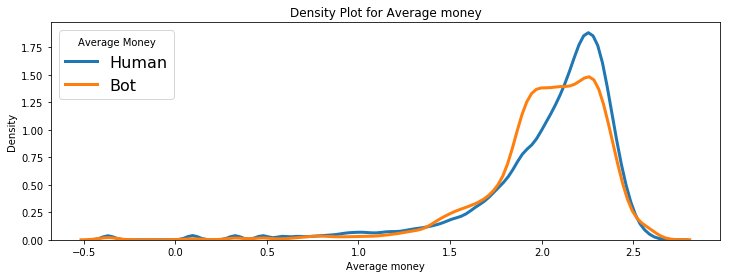

In [145]:
plot_dims = (12, 4)
fig, axis = plt.subplots(figsize=plot_dims)

for player_type in ['Human', 'Bot']:
    subset = tmp[tmp.Type == player_type]
    sns.distplot(subset['avg_money'], hist=False, kde=True,
                 kde_kws={'linewidth': 3}, label=player_type, ax=axis)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Average Money')
plt.title('Density Plot for Average money')
plt.xlabel('Average money')
plt.ylabel('Density')